In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.models import load_model
import matplotlib.pyplot as plt
stock = input("enter stock number:")
x_test = np.load('./StockData/TrainingData/NormtestingX_stock'+stock+'.npy')
y_test = np.load('./StockData/TrainingData/testingY_stock'+stock+'.npy')
origin_x_test = np.load('./StockData/TrainingData/opentestingX_stock'+stock+'.npy')


#x_train = np.where(np.isnan(x_train), 0, x_train)
x_test = np.where(np.isnan(x_test), 0, x_test)
#y_train = np.where(np.isnan(y_train), 0, y_train)
#x_train =x_train.reshape(-1,5,x_train.shape[1])
x_test =x_test.reshape(-1,5,x_test.shape[1])

Using TensorFlow backend.


enter stock number:0050


In [4]:
model=load_model('./stockModel/stockmodel_'+stock+'.h5')

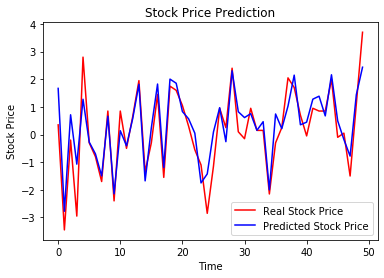

In [5]:
predicted_stock_price = model.predict(x_test)
#predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [6]:
'''
利用預測的數字如果為正，依照預測的數字比例來進行購買股票以1000為基準乘以(1+預測數字)
而realmoney則為利用y_test的值去判斷是否依照比例進行購買
'''
get_from_predict = 0   #預測所能獲得金額
predict_cost = 0 #成本
real_cost = 0
get_from_real = 0   #真實獲得金額
amount = 1000  #購買的數量
predict = model.predict( x_test )

for predict_money , real_money , open_money in zip( predict , y_test ,origin_x_test):
    if predict_money > 0: 
        get_from_predict += int( amount ) * real_money
        predict_cost += open_money * int( amount )
    if real_money > 0 :
        get_from_real += int( amount ) * real_money
        real_cost += open_money*1000
    #print(get_from_real)
#get_from_predict = round( get_from_predict[0] , 2 )
#get_from_real = round( get_from_real , 2 )
print('predict money:' , get_from_predict)
print('predict cost' , predict_cost)
print('real money:' , get_from_real)
money = round((( get_from_predict/predict_cost )*100) , 2)
print(money , '%')
money = round((( get_from_real/real_cost )*100) , 2)
print(money , '%')

predict money: 29650.0
predict cost 2856000.0
real money: 32750.0
1.04 %
1.38 %
